# Perform ‘Exploratory Data Analysis’ on dataset
Nachiket Patel

# Import libraries.

In [58]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot
from sklearn import linear_model,preprocessing
import seaborn

# Load dataset.

In [59]:
data = pd.read_csv('SampleSuperstore.csv')
data

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.9600         2   
1           42420  South        Furniture       Chairs  731.9400         3   
2           90036   West  Office Supplies       Labels   14.6200         2   
3           33311  South        Furniture       Tables  957.5775         5   
4           33311  South  Office Supplies      Storage   22.3680         2   
...           ...    ...              ...          ...       ...       ...   
9989        33180  South        Furniture  Furnishings   25.2480         3   
9990        92627   West        Furniture  Furnishings   91.9600         2   
9991        92627   West       Technology       Phones  258.5760         2   
9992        92627   West  Office Supplies        Paper   29.6000         4   
9993        92683   West  Office Supplies   Appliances  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.00   13.3200  
9993      0.00   72.9480  

[9994 rows x 13 columns]

In [60]:
data.shape

(9994, 13)

In [61]:
data.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [62]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [63]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [64]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [65]:
new_data = data[data['Profit'] >=0]
new_data

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
5     Standard Class   Consumer  United States      Los Angeles  California   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.960         2   
1           42420  South        Furniture       Chairs  731.940         3   
2           90036   West  Office Supplies       Labels   14.620         2   
4           33311  South  Office Supplies      Storage   22.368         2   
5           90032   West        Furniture  Furnishings   48.860         7   
...           ...    ...              ...          ...      ...       ...   
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount    Profit  
0          0.0   41.9136  
1          0.0  219.5820  
2          0.0    6.8714  
4          0.2    2.5164  
5          0.0   14.1694  
...        ...       ...  
9989       0.2    4.1028  
9990       0.0   15.6332  
9991       0.2   19.3932  
9992       0.0   13.3200  
9993       0.0   72.9480  

[8123 rows x 13 columns]

In [66]:
new_data.nunique()

Ship Mode          4
Segment            3
Country            1
City             513
State             49
Postal Code      610
Region             4
Category           3
Sub-Category      17
Sales           4608
Quantity          14
Discount           6
Profit          5645
dtype: int64

In [67]:
a =list(np.array(new_data['Sub-Category'].unique()))

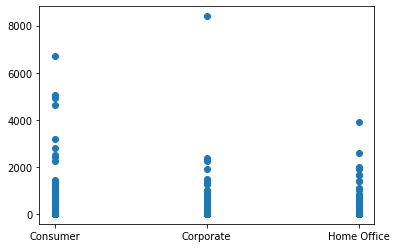

In [68]:
pyplot.scatter(new_data['Segment'],new_data['Profit'])

# Top 10 sels in state.

In [69]:
top_10_sels = data.groupby('State').Sales.sum().nlargest(n = 10)

In [70]:
top_10_sels

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64

# Top 10 Profit in state.

In [71]:
Top_10_profit = data.groupby("State").Profit.sum().nlargest(n =10)

In [72]:
Top_10_profit

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

<AxesSubplot:xlabel='State'>

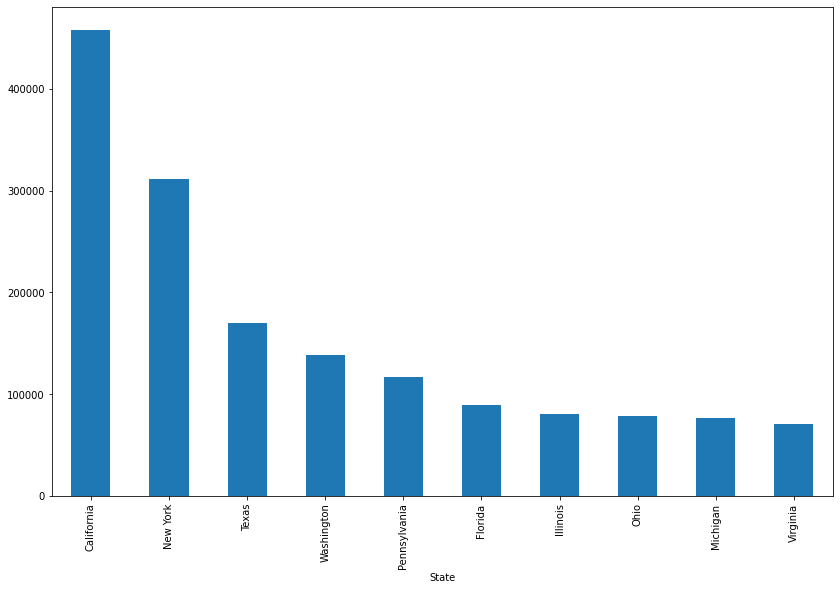

In [73]:
top_10_sels.plot(kind= 'bar',figsize = (14,9),style='seaborn')


In [74]:
Top_10_profit.plot(kind= 'bar',figsize = (14,9),style='seaborn')

<AxesSubplot:xlabel='State'>

# Region wise sales.

<AxesSubplot:xlabel='Region', ylabel='Sales'>

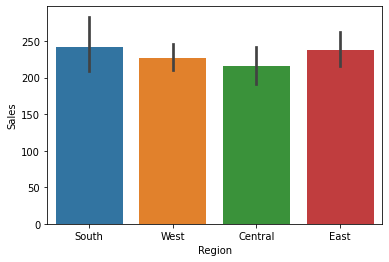

In [75]:
seaborn.barplot(x = 'Region',y ='Sales',data=data)

# Region v/s Profit (visualization)

In [76]:
from plotly import __version__
import cufflinks as cf
from  plotly.offline import plot
cf.go_offline
from plotly.offline import iplot
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

init_notebook_mode(connected=True)

cf.go_offline()

data.iplot(x="Region", y="Profit",kind='bar',title='Region VS Profit',xTitle='Region',yTitle='Profit',color='black') #visualisation



# Region v/s Discount.

In [77]:
data.iplot(x="Region", y="Discount",kind='bar',title='Region VS Discount',xTitle='Region',yTitle='Discount',color='blue') #visualisation


# Category v/s Discount.

In [78]:
data.iplot(x="Category", y="Discount",kind='bar',title='Category VS Discount',xTitle='Category',yTitle='Discount',color='red') #visualisation


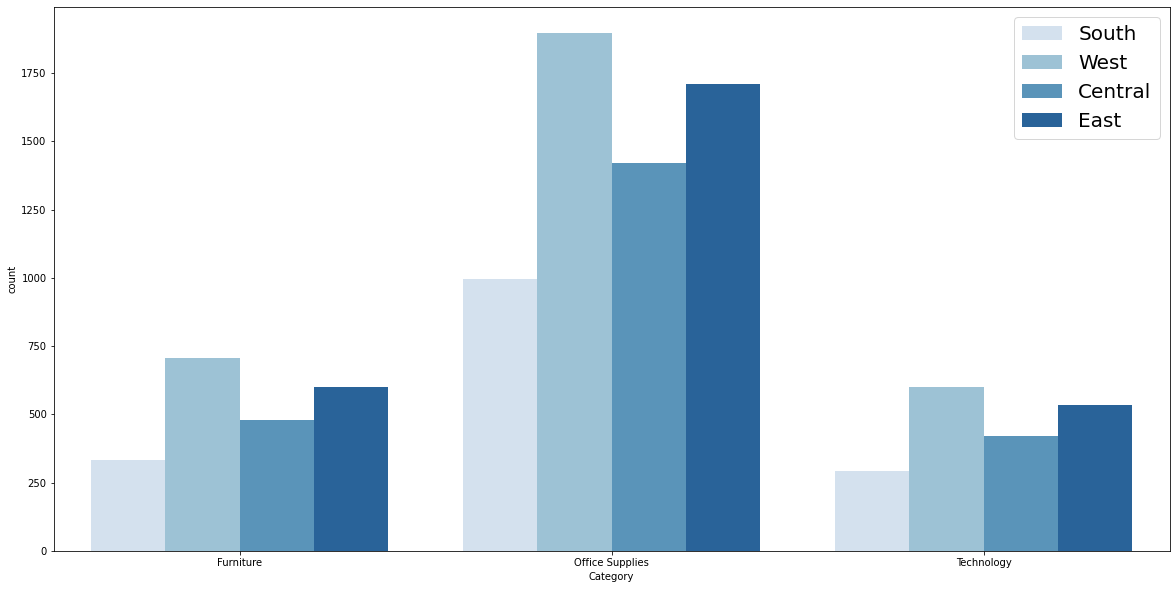

In [79]:
pyplot.figure(figsize=(20,10))
seaborn.countplot(x = 'Category',hue='Region',data=data,palette='Blues')
pyplot.legend(loc = 1, fontsize = 20)

In [80]:
data.iplot(x ='Sub-Category',y ='Sales',kind='bar',xTitle='Sub-Category',yTitle="Sales",color='red')


<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

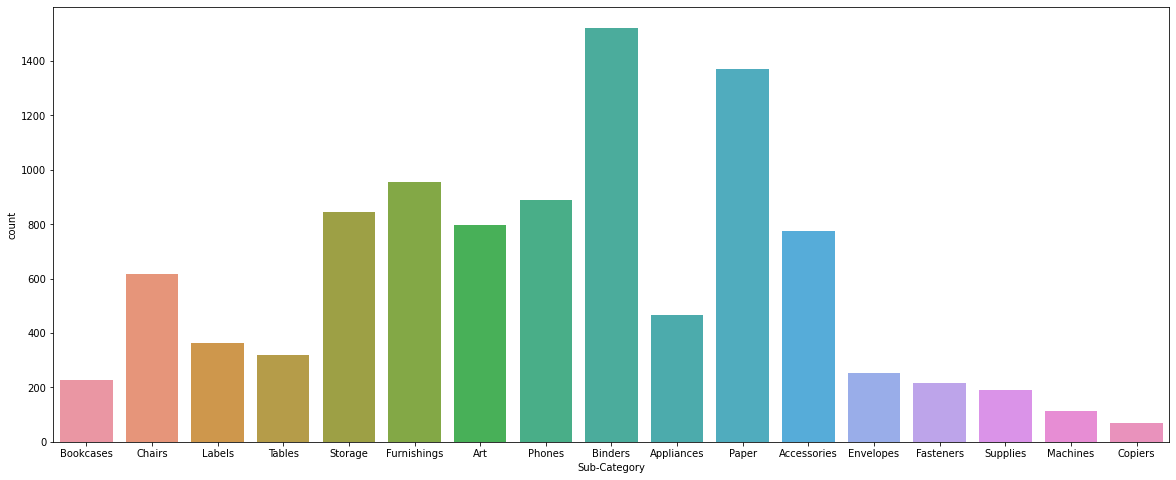

In [81]:
pyplot.figure(figsize=(20,8))
seaborn.countplot(x=data['Sub-Category'])

In [82]:
data.iplot(x='Sub-Category',y='Profit',kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

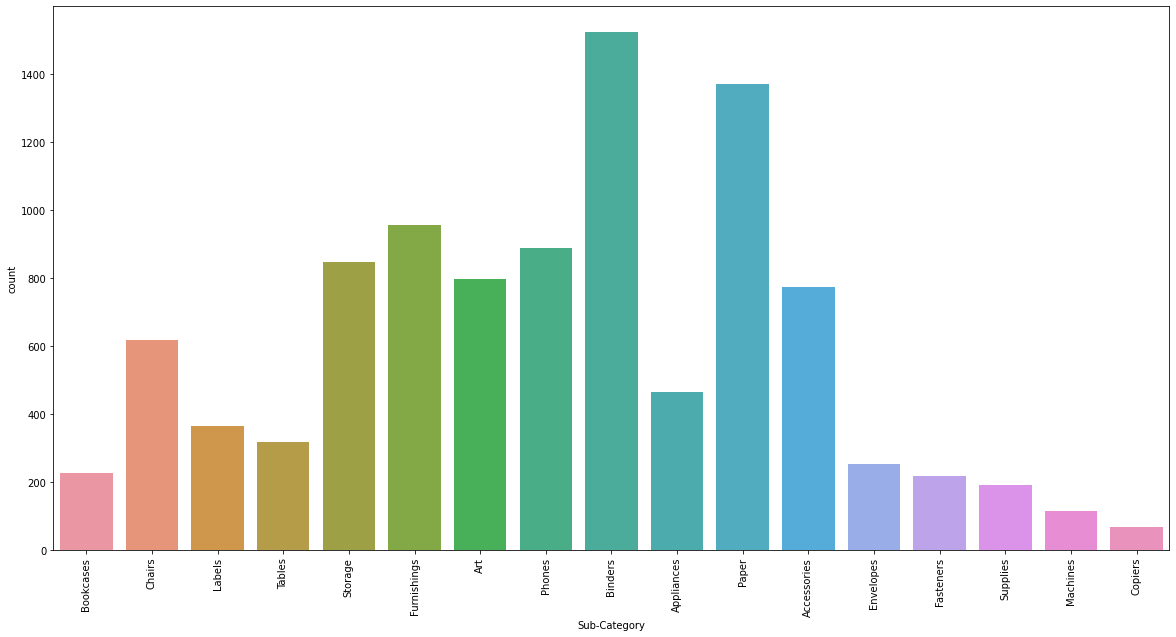

In [83]:
pyplot.figure(figsize=(20,10))
seaborn.countplot(x=data['Sub-Category'])
pyplot.xticks(rotation=90)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

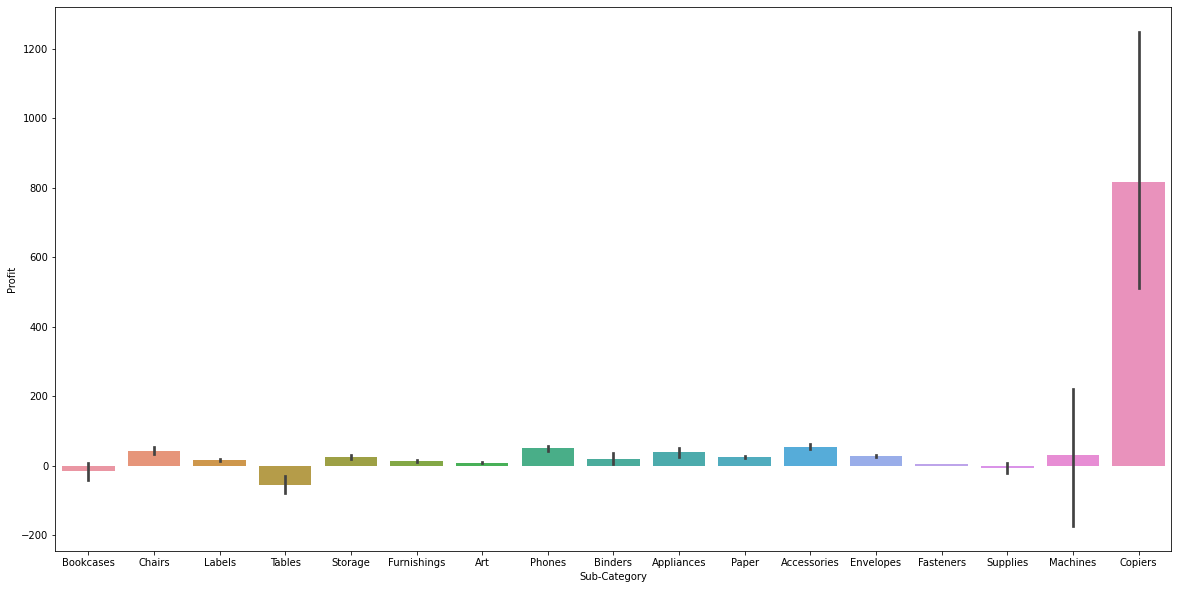

In [84]:
pyplot.figure(figsize=(20,10))
seaborn.barplot(x=data['Sub-Category'],y= data['Profit'],data=data)

# Profit by sub-category and Category

<AxesSubplot:xlabel='Category', ylabel='Profit'>

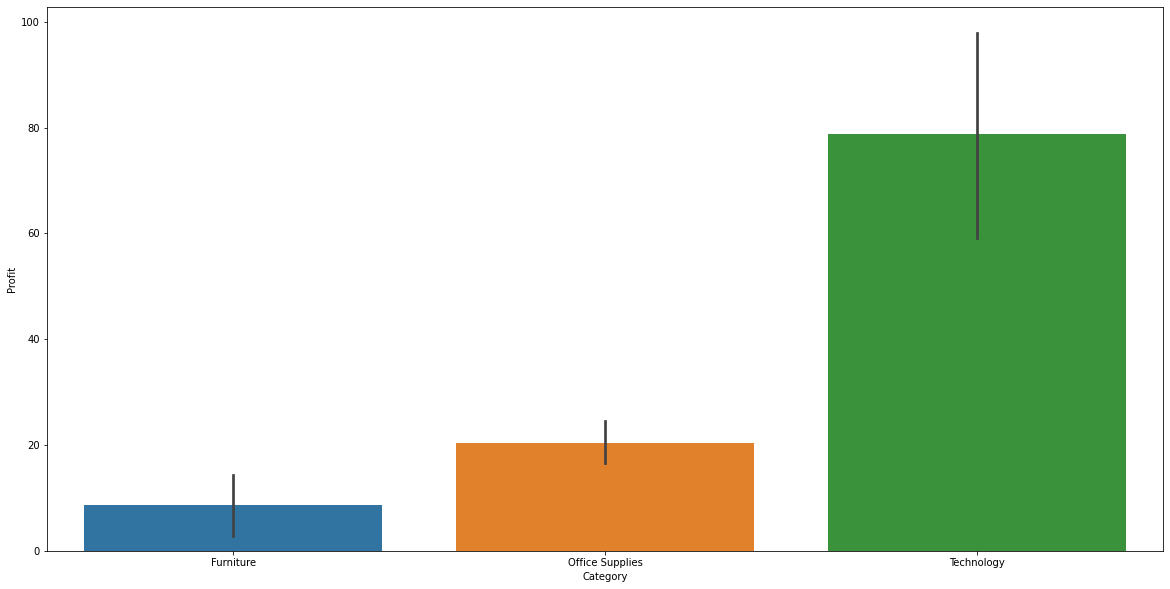

In [85]:
pyplot.figure(figsize=(20,10))
seaborn.barplot(x=data['Category'],y=data['Profit'],data=data)

In [86]:
data[data['Category']=='Office Supplies']['Sub-Category'].unique()

array(['Labels', 'Storage', 'Art', 'Binders', 'Appliances', 'Paper',
       'Envelopes', 'Fasteners', 'Supplies'], dtype=object)

In [87]:
data[data['Category']=='Furniture']['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [88]:
n_data=data[data['Category']=='Technology']

In [89]:
n_data

Ship Mode    Segment        Country           City       State  \
7     Standard Class   Consumer  United States    Los Angeles  California   
11    Standard Class   Consumer  United States    Los Angeles  California   
19      Second Class   Consumer  United States  San Francisco  California   
26      Second Class   Consumer  United States    Los Angeles  California   
35       First Class  Corporate  United States     Richardson       Texas   
...              ...        ...            ...            ...         ...   
9983  Standard Class   Consumer  United States   Grand Rapids    Michigan   
9986  Standard Class   Consumer  United States    Los Angeles  California   
9987  Standard Class  Corporate  United States         Athens     Georgia   
9988  Standard Class  Corporate  United States         Athens     Georgia   
9991  Standard Class   Consumer  United States     Costa Mesa  California   

      Postal Code   Region    Category Sub-Category     Sales  Quantity  \
7           90032     West  Technology       Phones   907.152         6   
11          90032     West  Technology       Phones   911.424         4   
19          94109     West  Technology       Phones   213.480         3   
26          90049     West  Technology  Accessories    90.570         3   
35          75080  Central  Technology       Phones  1097.544         7   
...           ...      ...         ...          ...       ...       ...   
9983        49505  Central  Technology       Phones    97.980         2   
9986        90008     West  Technology  Accessories    36.240         1   
9987        30605    South  Technology  Accessories    79.990         1   
9988        30605    South  Technology       Phones   206.100         5   
9991        92627     West  Technology       Phones   258.576         2   

      Discount    Profit  
7          0.2   90.7152  
11         0.2   68.3568  
19         0.2   16.0110  
26         0.0   11.7741  
35         0.2  123.4737  
...        ...       ...  
9983       0.0   27.4344  
9986       0.0   15.2208  
9987       0.0   28.7964  
9988       0.0   55.6470  
9991       0.2   19.3932  

[1847 rows x 13 columns]

In [90]:
n_data['Sub-Category'].unique()

array(['Phones', 'Accessories', 'Machines', 'Copiers'], dtype=object)

In [91]:
n_data.iplot(x='Sub-Category',y='Sales',kind='bar')

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

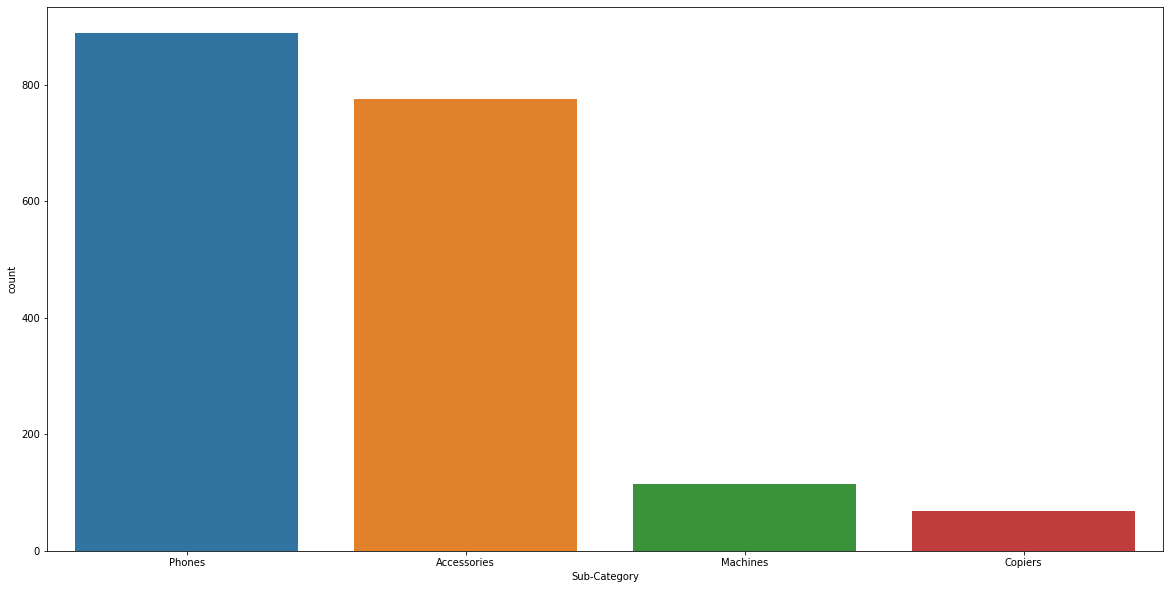

In [92]:
pyplot.figure(figsize=(20,10))
seaborn.countplot(x=n_data['Sub-Category'])


<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

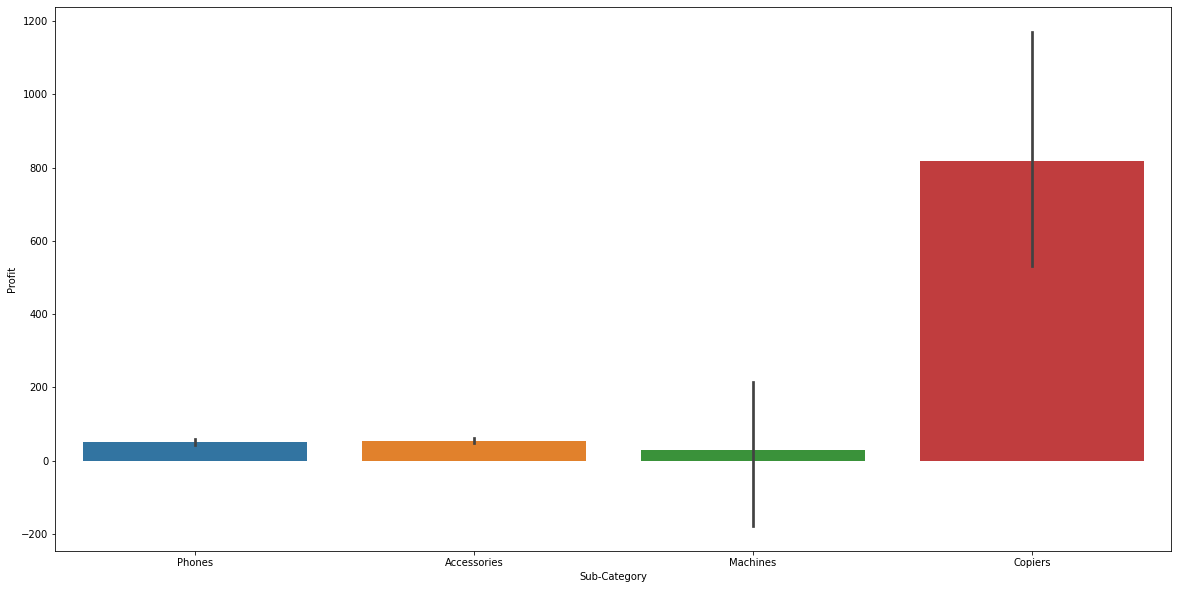

In [93]:
pyplot.figure(figsize=(20,10))
seaborn.barplot(x=n_data['Sub-Category'],y= n_data['Profit'],data=n_data)

# State wise profit and loss.

In [94]:
data.iplot(x='State',y='Profit',kind='bar',color='blue')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Kentucky'),
  Text(1, 0, 'California'),
  Text(2, 0, 'Florida'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Texas'),
  Text(6, 0, 'Wisconsin'),
  Text(7, 0, 'Utah'),
  Text(8, 0, 'Nebraska'),
  Text(9, 0, 'Pennsylvania'),
  Text(10, 0, 'Illinois'),
  Text(11, 0, 'Minnesota'),
  Text(12, 0, 'Michigan'),
  Text(13, 0, 'Delaware'),
  Text(14, 0, 'Indiana'),
  Text(15, 0, 'New York'),
  Text(16, 0, 'Arizona'),
  Text(17, 0, 'Virginia'),
  Text(18, 0, 'Tennessee'),
  Text(19, 0, 'Alabama'),
  Text(20, 0, 'South Carolina'),
  Text(21, 0, 'Oregon'),
  Text(22, 0, 'Colorado'),
  Text(23, 0, 'Iowa'),
  Text(24, 0, 'Ohio'),
  Text(25, 0, 'Missouri'),
  Text(26, 0, 'Oklahoma'),
  Text(27, 0, 'New Mexico'),
  Text(28, 0, 'Louisiana'),


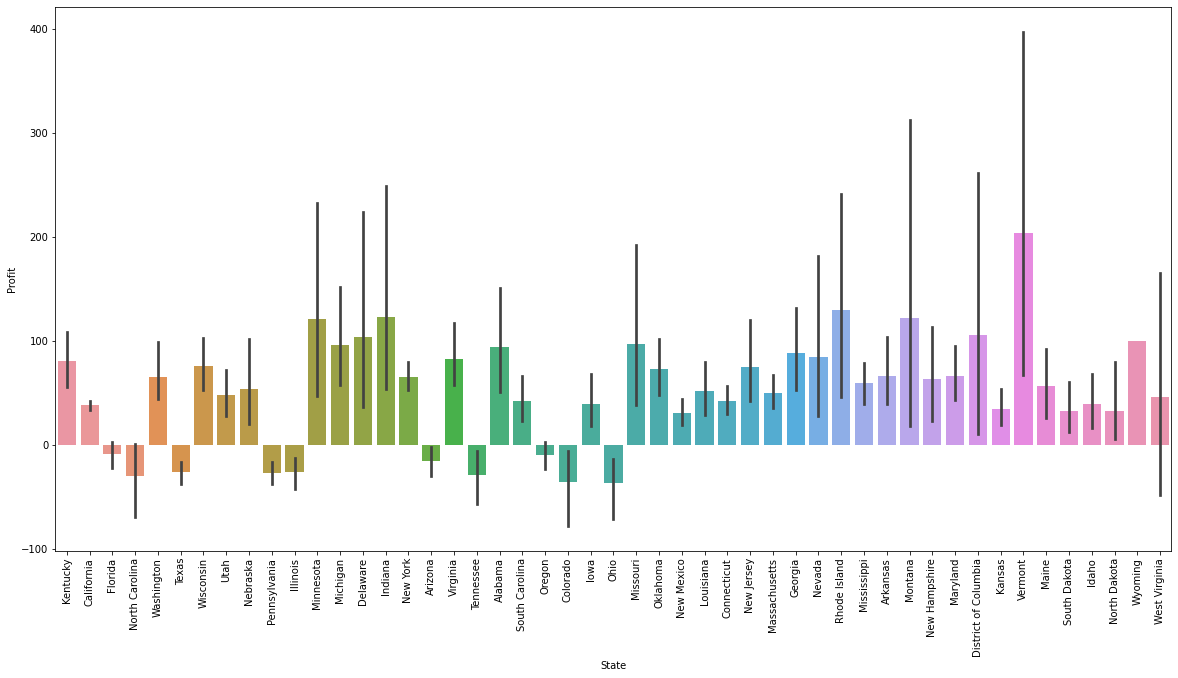

In [95]:
pyplot.figure(figsize=(20,10))
seaborn.barplot(x=data['State'],y=data['Profit'])
pyplot.xticks(rotation=90)

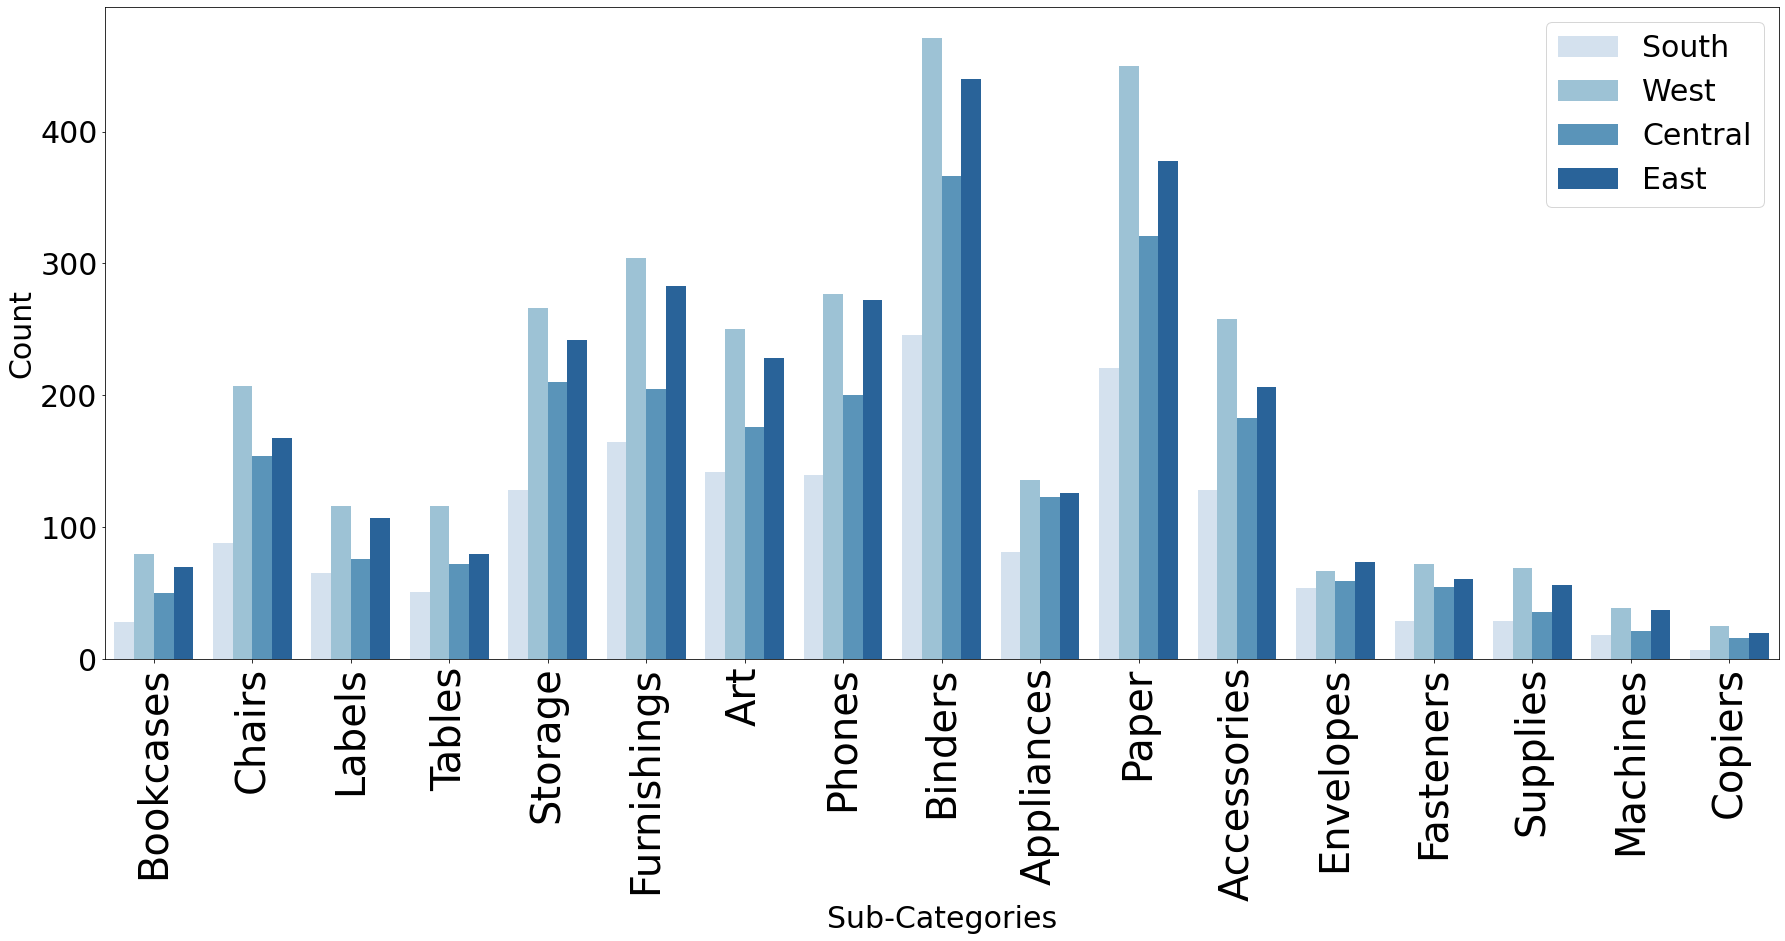

In [96]:
pyplot.figure(figsize = (30, 12))
seaborn.countplot(x = 'Sub-Category', hue = 'Region', data = data, palette = 'Blues')
pyplot.xticks(rotation = 90, fontsize = 40)
pyplot.yticks(fontsize = 30)
pyplot.xlabel('Sub-Categories',fontsize=30)
pyplot.ylabel('Count',fontsize=30)
pyplot.legend(loc = 1,fontsize=30)

Discount
Sub-Category          
Accessories   0.078452
Appliances    0.166524
Art           0.074874
Binders       0.372292
Bookcases     0.211140
Chairs        0.170178
Copiers       0.161765
Envelopes     0.080315
Fasteners     0.082028
Furnishings   0.138349
Labels        0.068681
Machines      0.306087
Paper         0.074891
Phones        0.154556
Storage       0.074704
Supplies      0.076842
Tables        0.261285

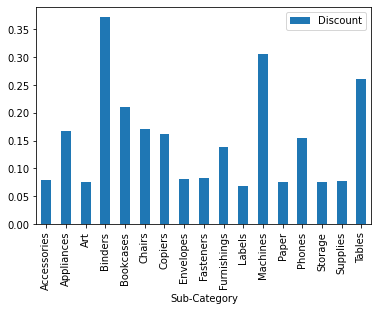

In [97]:
pivot1=pd.pivot_table(data,index='Sub-Category',values='Discount')
pivot1.plot(kind='bar')
pivot1

# SUMMARY POINTS TO CONCLUDE
1)Total sales in US is 2296195.5903

2)Total profit in US is 286241.4226

3)Top 10 States by Sales: 'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'

4)Top 10 States by Profit: 'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'

4)California and New York are far ahead of their competitor states in terms of Profits.
Factors which are co-related

sales and profits are positively correlated

Discount and Profits are Negatively correlated



Hence we say that in above 2 graphs having 0 discount there positive relation between Profit and sales.
Hence, we see that There is strong correlation between sales and Profit i.e 0.92 .
Regions with Sub-Category-Here West and east have high no of sub category .
we can conclude that people residing in the west region order more as compared to other regions.

Standard class is more in all classes as compare to others and consumer is more in all other modes.
In Segment section It tells that all are equal atmost but Home Office is greater in all except in central Region.

Sub catergory with more sales
*phones
*chairs
*storage
*Tables
*Binders
*Machines

1.Sales are more in Copiers and Machines as compared to others in Sub-Catergory .

2.Sales are more in Technology and less in Office under Category.

3.Highest count in sub-category - Binders , Paper , Furnishing , Storage , Accessories .

4.There is More loss in Binder , Tables , Machines , Chair ,BookCases as compared to profits in Sub-Caterogry.

5.products like phones and copiers give more profit in Catergory.
6.Technology gives you more profit in Catergory.
7.Furniture gives you more loss in Catergory .

8.States with more loss are Ohio , Texas , Illinos , Minnesota , Tennessee , Arizona , Pennsylvania .

9.States with more profit are California and New York .

10.Sub-Catergory with more discount are Binders , Bookcases , Machines , Tables .

11.Catergory with more discount in Furnitures 

# 